In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('E:/Datasets/house_prices/train.csv')
df_test=pd.read_csv('E:/Datasets/house_prices/test.csv')

In [2]:
with open("E:/Datasets/house_prices/data_description.txt",'r') as data:
    for line in data:
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [3]:
# MSSubClass is a numerical dataset, but it should be categorical since the higher number of class does not mean positive or negative correlation to the price. Let's see more detail about the data!

## Data preprocessing

In [4]:
df.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
df.MSSubClass=df.MSSubClass.astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
#num:38, object:43
cate=df.select_dtypes(include='object')
nume=df.select_dtypes(exclude='object')

In [12]:
nume

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1         65.0     8450            7            5       2003   
1        2         80.0     9600            6            8       1976   
2        3         68.0    11250            7            5       2001   
3        4         60.0     9550            7            5       1915   
4        5         84.0    14260            8            5       2000   
...    ...          ...      ...          ...          ...        ...   
1455  1456         62.0     7917            6            5       1999   
1456  1457         85.0    13175            6            6       1978   
1457  1458         66.0     9042            7            9       1941   
1458  1459         68.0     9717            5            6       1950   
1459  1460         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

### Fillna & Remove irrelevant features

In [13]:
# I went with whole dataframe at the first trial and since there are too many features, I could not show clear numbers with figures. Thus, I am going to do visualization after handling all the data with separating numerical and categorical features 

#### Numerical features

In [14]:
nume.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [15]:
corr_id=nume['Id'].corr(nume['SalePrice'])
corr_id

-0.02191671944343111

In [16]:
nume=nume.set_index('Id')

In [17]:
#drop the low correlation to saleprice -> even id,which should be random to the price, has -2.1 percents correlation, i dropped out lower correlation than Id.
df_lowcor=abs(nume.corr()['SalePrice'])<abs(corr_id)
df_lowcor_col=df[df_lowcor.index[df_lowcor]].columns

In [18]:
df_lowcor_col

Index(['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal'], dtype='object')

In [19]:
nume.drop(nume[df_lowcor_col],axis=1,inplace=True)
df.drop(df[df_lowcor_col],axis=1,inplace=True)
df_test.drop(df_test[df_lowcor_col],axis=1,inplace=True)

In [20]:
nume.MasVnrArea.fillna(nume.MasVnrArea.mode()[0],inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mode()[0],inplace=True)

In [21]:
nume.GarageYrBlt.value_counts().head(10)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
Name: GarageYrBlt, dtype: int64

In [22]:
nume.loc[nume.GarageYrBlt.isna()]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
40           65.0     6040            4            5       1955          1955   
49           33.0     4456            4            5       1920          2008   
79           72.0    10778            4            5       1968          1968   
89          105.0     8470            3            2       1915          1982   
90           60.0     8070            4            5       1994          1995   
...           ...      ...          ...          ...        ...           ...   
1350         50.0     5250            8            5       1872          1987   
1408          NaN     8780            5            5       1985          1985   
1450         21.0     1533            5            7       1970          1970   
1451         60.0     9000            5            5       1974          1974   
1454         90.0    17217            5            5       2006          2006   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  \
Id                                                    ...               
40           0.0           0          0            0  ...           0   
49           0.0           0        736          736  ...           0   
79           0.0           0       1768         1768  ...           0   
89           0.0           0       1013         1013  ...           0   
90           0.0         588        402          990  ...           0   
...          ...         ...        ...          ...  ...         ...   
1350         0.0         259        425          684  ...           0   
1408         0.0         625        208          833  ...           0   
1450         0.0         553         77          630  ...           0   
1451         0.0           0        896          896  ...           0   
1454         0.0           0       1140         1140  ...           0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                     
40             0            0              0          0            0   
49             0            0            102          0            0   
79             0            0              0          0            0   
89             0            0            156          0            0   
90             0            0              0          0            0   
...          ...          ...            ...        ...          ...   
1350           0           54             20          0            0   
1408           0            0              0          0            0   
1450           0            0              0          0            0   
1451          32           45              0          0            0   
1454          36           56              0          0            0   

      PoolArea  MoSold  YrSold  SalePrice  
Id                                         
40           0       6    2008      82000  
49           0       6    2009     113000  
79           0       4    2010     136500  
89           0      10    2009      85000  
90           0       8    2007     123600  
...        ...     ...     ...        ...  
1350         0      12    2008     122000  
1408         0       3    2009     112000  
1450         0       8    2006      92000  
1451         0       9    2009     136000  
1454         0       7    2006      84500  

[81 rows x 33 columns]

In [23]:
nume.corr()['GarageYrBlt'].sort_values()

OverallCond     -0.324297
EnclosedPorch   -0.297003
KitchenAbvGr    -0.124411
ScreenPorch     -0.075418
BedroomAbvGr    -0.064518
LowQualFinSF    -0.036363
LotArea         -0.024947
PoolArea        -0.014501
YrSold          -0.001014
MoSold           0.005337
3SsnPorch        0.023544
Fireplaces       0.046822
LotFrontage      0.070250
2ndFlrSF         0.070832
BsmtFullBath     0.124553
TotRmsAbvGrd     0.148112
BsmtFinSF1       0.153484
BsmtUnfSF        0.190708
HalfBath         0.196785
WoodDeckSF       0.224577
OpenPorchSF      0.228425
GrLivArea        0.231197
1stFlrSF         0.233449
MasVnrArea       0.248546
TotalBsmtSF      0.322445
FullBath         0.484557
SalePrice        0.486362
OverallQual      0.547766
GarageArea       0.564567
GarageCars       0.588920
YearRemodAdd     0.642277
YearBuilt        0.825667
GarageYrBlt      1.000000
Name: GarageYrBlt, dtype: float64

In [24]:
nume.YearBuilt #fillna with yearbuilt that has 82.5 percents correlation. means most likely same year to build main property and garage together

Id
1       2003
2       1976
3       2001
4       1915
5       2000
        ... 
1456    1999
1457    1978
1458    1941
1459    1950
1460    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [25]:
nume.GarageYrBlt.fillna(nume.YearBuilt,inplace=True)
df.GarageYrBlt.fillna(df.YearBuilt,inplace=True)

In [26]:
nume

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1            65.0     8450            7            5       2003          2003   
2            80.0     9600            6            8       1976          1976   
3            68.0    11250            7            5       2001          2002   
4            60.0     9550            7            5       1915          1970   
5            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1456         62.0     7917            6            5       1999          2000   
1457         85.0    13175            6            6       1978          1988   
1458         66.0     9042            7            9       1941          2006   
1459         68.0     9717            5            6       1950          1996   
1460         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  \
Id                                                    ...               
1          196.0         706        150          856  ...         548   
2            0.0         978        284         1262  ...         460   
3          162.0         486        434          920  ...         608   
4            0.0         216        540          756  ...         642   
5          350.0         655        490         1145  ...         836   
...          ...         ...        ...          ...  ...         ...   
1456         0.0           0        953          953  ...         460   
1457       119.0         790        589         1542  ...         500   
1458         0.0         275        877         1152  ...         252   
1459         0.0          49          0         1078  ...         240   
1460         0.0         830        136         1256  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                     
1              0           61              0          0            0   
2            298            0              0          0            0   
3              0           42              0          0            0   
4              0           35            272          0            0   
5            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1456           0           40              0          0            0   
1457         349            0              0          0            0   
1458           0           60              0          0            0   
1459         366            0            112          0            0   
1460         736           68              0          0            0   

      PoolArea  MoSold  YrSold  SalePrice  
Id                                         
1            0       2    2008     208500  
2            0       5    2007     181500  
3            0       9    2008     223500  
4            0       2    2006     140000  
5            0      12    2008     250000  
...        ...     ...     ...        ...  
1456         0       8    2007     175000  
1457         0       2    2010     210000  
1458         0       5    2010     266500  
1459         0       4    2010     142125  
1460         0       6    2008     147500  

[1460 rows x 33 columns]

In [27]:
nume.LotFrontage.isna().sum()

259

In [28]:
nume.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [29]:
nume['LotFrontage'].corr(nume['SalePrice']) #0.352

0.351799096570678

In [30]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
nume['LotFrontage'].fillna(nume['LotFrontage'].mean(),inplace=True)

In [31]:
nume['LotFrontage'].corr(nume['SalePrice']) #0.335.  Dropping 1.7 percents correlation. Fillna with median doesnt harm much with deciding saleprice. 

0.3349008515405507

In [32]:
nume

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1            65.0     8450            7            5       2003          2003   
2            80.0     9600            6            8       1976          1976   
3            68.0    11250            7            5       2001          2002   
4            60.0     9550            7            5       1915          1970   
5            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1456         62.0     7917            6            5       1999          2000   
1457         85.0    13175            6            6       1978          1988   
1458         66.0     9042            7            9       1941          2006   
1459         68.0     9717            5            6       1950          1996   
1460         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  \
Id                                                    ...               
1          196.0         706        150          856  ...         548   
2            0.0         978        284         1262  ...         460   
3          162.0         486        434          920  ...         608   
4            0.0         216        540          756  ...         642   
5          350.0         655        490         1145  ...         836   
...          ...         ...        ...          ...  ...         ...   
1456         0.0           0        953          953  ...         460   
1457       119.0         790        589         1542  ...         500   
1458         0.0         275        877         1152  ...         252   
1459         0.0          49          0         1078  ...         240   
1460         0.0         830        136         1256  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                     
1              0           61              0          0            0   
2            298            0              0          0            0   
3              0           42              0          0            0   
4              0           35            272          0            0   
5            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1456           0           40              0          0            0   
1457         349            0              0          0            0   
1458           0           60              0          0            0   
1459         366            0            112          0            0   
1460         736           68              0          0            0   

      PoolArea  MoSold  YrSold  SalePrice  
Id                                         
1            0       2    2008     208500  
2            0       5    2007     181500  
3            0       9    2008     223500  
4            0       2    2006     140000  
5            0      12    2008     250000  
...        ...     ...     ...        ...  
1456         0       8    2007     175000  
1457         0       2    2010     210000  
1458         0       5    2010     266500  
1459         0       4    2010     142125  
1460         0       6    2008     147500  

[1460 rows x 33 columns]

In [33]:
nume_corr=nume.corr()

<AxesSubplot:>

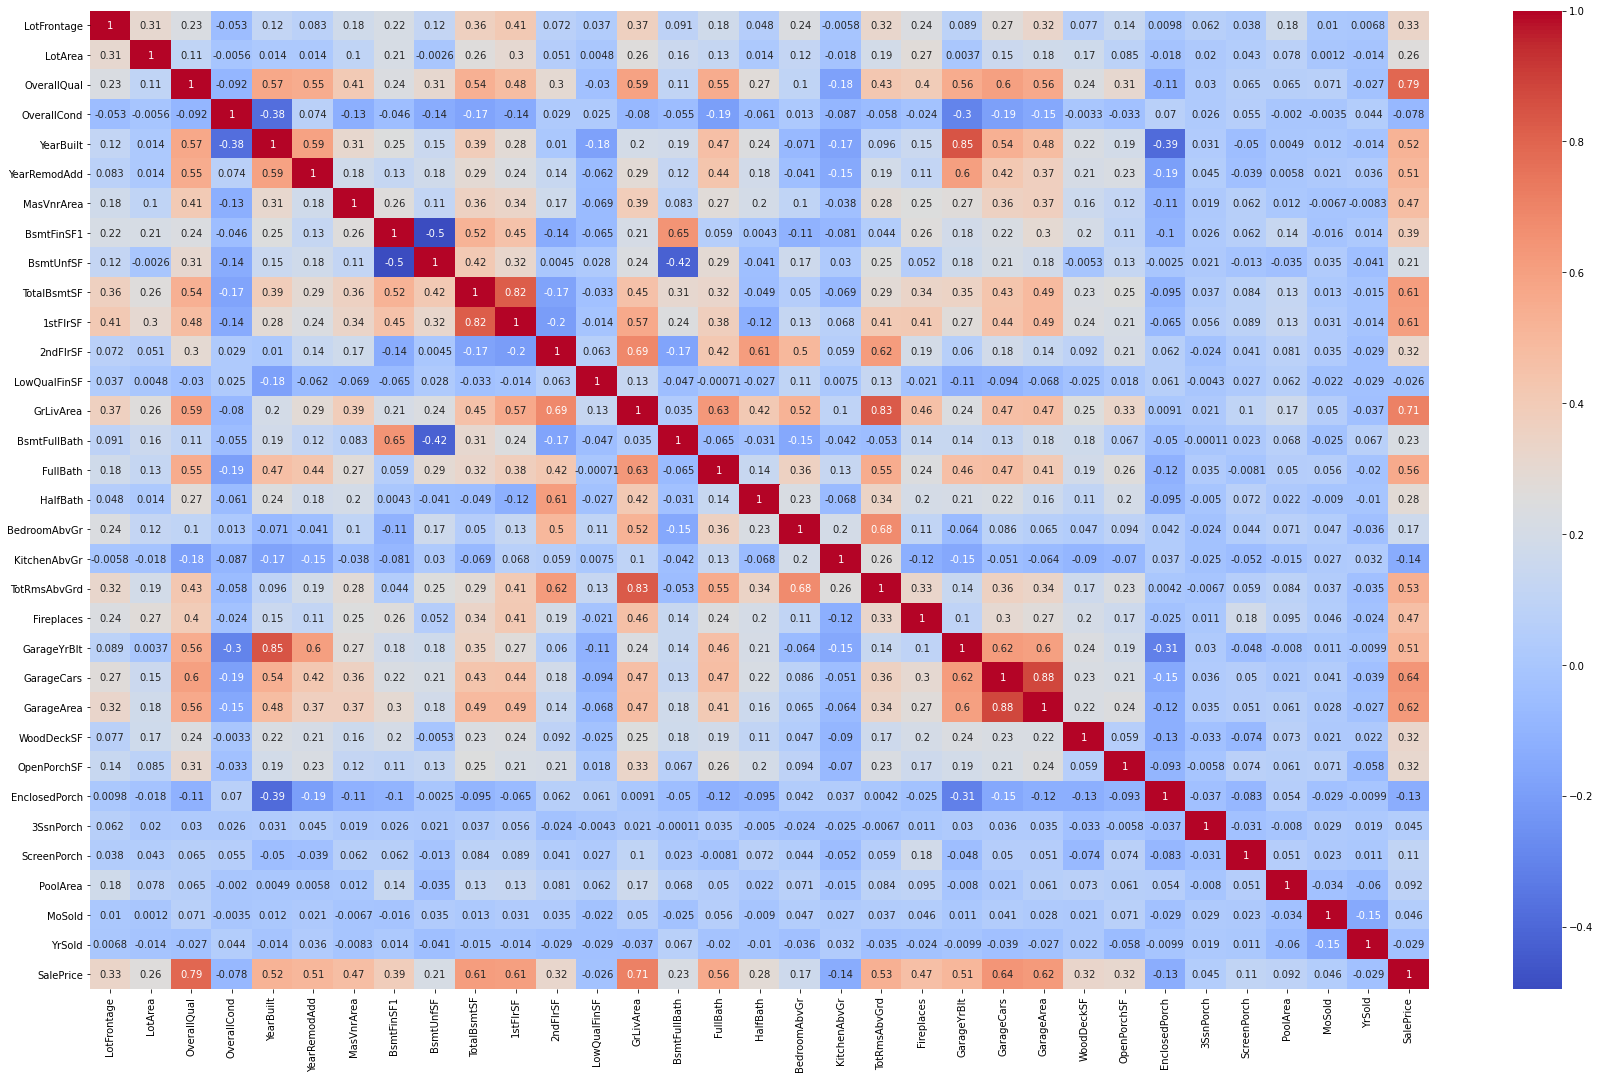

In [34]:
plt.figure(figsize=(30,18))
sns.heatmap(nume_corr,annot=True,cmap='coolwarm')

In [35]:
nume.isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [36]:
#yearbuilt and garageyrblt has 0.85 which is pretty high correlation with each features that is potentially harmful for redundant info. However, also 85 percents does not mean identical(in most of my projects, i dropped with 0.9 threshold) to bring further.

#### Categorical features

In [37]:
cate

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave   NaN      Reg         Lvl    AllPub   
1            20       RL   Pave   NaN      Reg         Lvl    AllPub   
2            60       RL   Pave   NaN      IR1         Lvl    AllPub   
3            70       RL   Pave   NaN      IR1         Lvl    AllPub   
4            60       RL   Pave   NaN      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1455         60       RL   Pave   NaN      Reg         Lvl    AllPub   
1456         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1457         70       RL   Pave   NaN      Reg         Lvl    AllPub   
1458         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1459         20       RL   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageType GarageFinish GarageQual  \
0       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
1          FR2       Gtl      Veenker  ...     Attchd          RFn         TA   
2       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
3       Corner       Gtl      Crawfor  ...     Detchd          Unf         TA   
4          FR2       Gtl      NoRidge  ...     Attchd          RFn         TA   
...        ...       ...          ...  ...        ...          ...        ...   
1455    Inside       Gtl      Gilbert  ...     Attchd          RFn         TA   
1456    Inside       Gtl       NWAmes  ...     Attchd          Unf         TA   
1457    Inside       Gtl      Crawfor  ...     Attchd          RFn         TA   
1458    Inside       Gtl        NAmes  ...     Attchd          Unf         TA   
1459    Inside       Gtl      Edwards  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 44 columns]

In [38]:
# identify bias features with one value (over 90 percents) 
leng=len(cate)
max_counts={}
for i in cate:
    max_cate=cate[i].value_counts()[0]/leng
    max_counts.update({i:max_cate})
print(max_counts)    

{'MSSubClass': 0.36712328767123287, 'MSZoning': 0.7883561643835616, 'Street': 0.9958904109589041, 'Alley': 0.03424657534246575, 'LotShape': 0.6335616438356164, 'LandContour': 0.897945205479452, 'Utilities': 0.9993150684931507, 'LotConfig': 0.7205479452054795, 'LandSlope': 0.9465753424657535, 'Neighborhood': 0.1541095890410959, 'Condition1': 0.863013698630137, 'Condition2': 0.9897260273972602, 'BldgType': 0.8356164383561644, 'HouseStyle': 0.49726027397260275, 'RoofStyle': 0.7815068493150685, 'RoofMatl': 0.9821917808219178, 'Exterior1st': 0.3527397260273973, 'Exterior2nd': 0.3452054794520548, 'MasVnrType': 0.5917808219178082, 'ExterQual': 0.6205479452054794, 'ExterCond': 0.8780821917808219, 'Foundation': 0.44315068493150683, 'BsmtQual': 0.44452054794520546, 'BsmtCond': 0.897945205479452, 'BsmtExposure': 0.6527397260273973, 'BsmtFinType1': 0.2945205479452055, 'BsmtFinType2': 0.8602739726027397, 'Heating': 0.9780821917808219, 'HeatingQC': 0.5075342465753425, 'CentralAir': 0.934931506849315

In [39]:
sorted(max_counts.items(),key=lambda item:item[1])

[('PoolQC', 0.002054794520547945),
 ('MiscFeature', 0.03356164383561644),
 ('Alley', 0.03424657534246575),
 ('Fence', 0.10753424657534247),
 ('Neighborhood', 0.1541095890410959),
 ('FireplaceQu', 0.2602739726027397),
 ('BsmtFinType1', 0.2945205479452055),
 ('Exterior2nd', 0.3452054794520548),
 ('Exterior1st', 0.3527397260273973),
 ('MSSubClass', 0.36712328767123287),
 ('GarageFinish', 0.4143835616438356),
 ('Foundation', 0.44315068493150683),
 ('BsmtQual', 0.44452054794520546),
 ('HouseStyle', 0.49726027397260275),
 ('KitchenQual', 0.5034246575342466),
 ('HeatingQC', 0.5075342465753425),
 ('MasVnrType', 0.5917808219178082),
 ('GarageType', 0.5958904109589042),
 ('ExterQual', 0.6205479452054794),
 ('LotShape', 0.6335616438356164),
 ('BsmtExposure', 0.6527397260273973),
 ('LotConfig', 0.7205479452054795),
 ('RoofStyle', 0.7815068493150685),
 ('MSZoning', 0.7883561643835616),
 ('SaleCondition', 0.8205479452054795),
 ('BldgType', 0.8356164383561644),
 ('BsmtFinType2', 0.8602739726027397),


In [40]:
#Getting rid of columns having too much portion with one value
bias_col=[]
for i in max_counts.items():
    if i[1] >0.90:
        bias_col.append(i[0])
# print(bias_col)
cate.drop(bias_col,axis=1,inplace=True)
df.drop(bias_col,axis=1,inplace=True)
df_test.drop(bias_col,axis=1,inplace=True)

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
cate[cate.columns[cate.isna().sum()!=0]]

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0      NaN    BrkFace       Gd       TA           No          GLQ   
1      NaN       None       Gd       TA           Gd          ALQ   
2      NaN    BrkFace       Gd       TA           Mn          GLQ   
3      NaN       None       TA       Gd           No          ALQ   
4      NaN    BrkFace       Gd       TA           Av          GLQ   
...    ...        ...      ...      ...          ...          ...   
1455   NaN       None       Gd       TA           No          Unf   
1456   NaN      Stone       Gd       TA           No          ALQ   
1457   NaN       None       TA       Gd           No          GLQ   
1458   NaN       None       TA       TA           Mn          GLQ   
1459   NaN       None       TA       TA           No          BLQ   

     BsmtFinType2 FireplaceQu GarageType GarageFinish GarageQual PoolQC  \
0             Unf         NaN     Attchd          RFn         TA    NaN   
1             Unf          TA     Attchd          RFn         TA    NaN   
2             Unf          TA     Attchd          RFn         TA    NaN   
3             Unf          Gd     Detchd          Unf         TA    NaN   
4             Unf          TA     Attchd          RFn         TA    NaN   
...           ...         ...        ...          ...        ...    ...   
1455          Unf          TA     Attchd          RFn         TA    NaN   
1456          Rec          TA     Attchd          Unf         TA    NaN   
1457          Unf          Gd     Attchd          RFn         TA    NaN   
1458          Rec         NaN     Attchd          Unf         TA    NaN   
1459          LwQ         NaN     Attchd          Fin         TA    NaN   

      Fence MiscFeature  
0       NaN         NaN  
1       NaN         NaN  
2       NaN         NaN  
3       NaN         NaN  
4       NaN         NaN  
...     ...         ...  
1455    NaN         NaN  
1456  MnPrv         NaN  
1457  GdPrv        Shed  
1458    NaN         NaN  
1459    NaN         NaN  

[1460 rows x 14 columns]

In [42]:
(cate.isna().sum()/len(cate)).sort_values()

MSSubClass       0.000000
KitchenQual      0.000000
HeatingQC        0.000000
SaleType         0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofStyle        0.000000
Foundation       0.000000
BldgType         0.000000
MSZoning         0.000000
HouseStyle       0.000000
LotShape         0.000000
LandContour      0.000000
SaleCondition    0.000000
LotConfig        0.000000
Neighborhood     0.000000
Condition1       0.000000
MasVnrType       0.005479
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtExposure     0.026027
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
dtype: float64

In [43]:
cate.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [44]:
# drop the columns with more than 40% Nan
cate.drop(['Alley','PoolQC','Fence','FireplaceQu','MiscFeature'],axis=1,inplace=True)
df.drop(['Alley','PoolQC','Fence','FireplaceQu','MiscFeature'],axis=1,inplace=True)
df_test.drop(['Alley','PoolQC','Fence','FireplaceQu','MiscFeature'],axis=1,inplace=True)

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
(cate.isna().sum()/len(cate)).sort_values()

MSSubClass       0.000000
KitchenQual      0.000000
HeatingQC        0.000000
Foundation       0.000000
ExterCond        0.000000
SaleType         0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofStyle        0.000000
ExterQual        0.000000
BldgType         0.000000
MSZoning         0.000000
LotShape         0.000000
HouseStyle       0.000000
LandContour      0.000000
SaleCondition    0.000000
Neighborhood     0.000000
Condition1       0.000000
LotConfig        0.000000
MasVnrType       0.005479
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtExposure     0.026027
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
dtype: float64

In [46]:
cate.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [47]:
cate.BsmtCond.fillna(cate.BsmtCond.mode()[0],inplace=True)
df.BsmtCond.fillna(df.BsmtCond.mode()[0],inplace=True)

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [48]:
cate.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [49]:
cate.BsmtFinType2.fillna(cate.BsmtFinType2.mode()[0],inplace=True)
df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0],inplace=True)

In [50]:
cate.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [51]:
cate.GarageQual.fillna(cate.GarageQual.mode()[0],inplace=True)
df.GarageQual.fillna(df.GarageQual.mode()[0],inplace=True)

In [52]:
cate.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [53]:
cate.GarageFinish.fillna(cate.GarageFinish.mode()[0],inplace=True)
df.GarageFinish.fillna(df.GarageFinish.mode()[0],inplace=True)

In [54]:
cate.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [55]:
cate.GarageType.fillna(cate.GarageType.mode()[0],inplace=True)
df.GarageType.fillna(df.GarageType.mode()[0],inplace=True)

In [56]:
cate.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [57]:
cate.BsmtExposure.fillna(cate.BsmtExposure.mode()[0],inplace=True)
df.BsmtExposure.fillna(df.BsmtExposure.mode()[0],inplace=True)

In [58]:
cate.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [59]:
cate.MasVnrType.fillna(cate.MasVnrType.mode()[0],inplace=True)
df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)

In [60]:
'''
BsmtFinType1: Rating of basement finished area

   GLQ    Good Living Quarters
   ALQ    Average Living Quarters
   BLQ    Below Average Living Quarters    
   Rec    Average Rec Room
   LwQ    Low Quality
   Unf    Unfinshed
   NA    No Basement
'''

'\nBsmtFinType1: Rating of basement finished area\n\n   GLQ    Good Living Quarters\n   ALQ    Average Living Quarters\n   BLQ    Below Average Living Quarters    \n   Rec    Average Rec Room\n   LwQ    Low Quality\n   Unf    Unfinshed\n   NA    No Basement\n'

In [61]:
cate.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [62]:
cate.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [63]:
cate.isna().sum()

MSSubClass        0
MSZoning          0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond          0
BsmtExposure      0
BsmtFinType1     37
BsmtFinType2      0
HeatingQC         0
KitchenQual       0
GarageType        0
GarageFinish      0
GarageQual        0
SaleType          0
SaleCondition     0
dtype: int64

In [64]:
cate_pre_saleprice=cate.copy()
cate_pre_saleprice['SalePrice']=df['SalePrice']
cate['SalePrice']=df['SalePrice']

<ipython-input-64-cbdb87da85a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate['SalePrice']=df['SalePrice']


In [65]:
cate_sales=cate_pre_saleprice.loc[cate_pre_saleprice.BsmtQual.isna()]

In [66]:
cate_sales.sort_values('SalePrice')

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood  \
533          20       RL      Reg         Low    Inside      BrkSide   
705         190       RM      Reg         Lvl    Inside       IDOTRR   
1321         20       RL      IR1         Lvl    Corner      BrkSide   
1218         50       RM      Reg         Lvl    Inside      BrkSide   
39           90       RL      Reg         Lvl    Inside      Edwards   
1000         20       RL      Reg         Lvl    Corner      Edwards   
1035         20       RL      IR1         Lvl   CulDSac      Edwards   
1049         20       RL      Reg         Low    Inside      Edwards   
342          90       RL      Reg         Lvl    Inside        NAmes   
17           90       RL      Reg         Lvl    Inside       Sawyer   
1412         90       RL      Reg         Lvl    Inside        NAmes   
1090         90       RL      Reg         Lvl    Corner        NAmes   
1179         20       RL      Reg         Lvl    Corner      Edwards   
736          90       RL      Reg         Lvl    Inside        NAmes   
259          20       RM      Reg         Lvl    Inside      OldTown   
749          50       RL      Reg         Lvl    Inside      Edwards   
646          20       RL      Reg         Lvl    Inside        NAmes   
1011         90       RL      Reg         Lvl    Inside      Edwards   
1232         90       RL      Reg         Lvl       FR2        NAmes   
520         190       RL      Reg         Lvl    Inside      OldTown   
392          20       RL      IR1         Lvl    Inside        NAmes   
532          20       RL      Reg         Lvl    Inside        NAmes   
553          20       RL      Reg         Lvl    Inside      Edwards   
156          20       RL      Reg         Lvl    Inside        NAmes   
90           20       RL      Reg         Lvl    Inside        NAmes   
1216         90       RM      Reg         Lvl    Inside       Sawyer   
1048         20       RL      Reg         Lvl    Inside      Mitchel   
894          90       RL      Reg         Bnk    Inside      SawyerW   
102          90       RL      Reg         Bnk    Inside      SawyerW   
182          20       RL      Reg         Lvl    Inside      Edwards   
984          90       RL      Reg         Lvl    Inside      Mitchel   
371          50       RL      Reg         Lvl    Inside      ClearCr   
1045         20       RL      IR1         Lvl   CulDSac      Edwards   
897          90       RL      Reg         Lvl    Inside      SawyerW   
778          90       RH      Reg         Lvl    Inside      SawyerW   
868          60       RL      IR2         Lvl    Corner      Gilbert   
362          85       RL      Reg         Lvl    Corner      Edwards   

     Condition1 BldgType HouseStyle RoofStyle  ... BsmtFinType1 BsmtFinType2  \
533        Norm     1Fam     1Story     Gable  ...          NaN          Unf   
705        Norm   2fmCon     2Story       Hip  ...          NaN          Unf   
1321      Feedr     1Fam     1Story       Hip  ...          NaN          Unf   
1218       Norm     1Fam     1.5Fin     Gable  ...          NaN          Unf   
39         Norm   Duplex     1Story     Gable  ...          NaN          Unf   
1000       Norm     1Fam     1Story      Flat  ...          NaN          Unf   
1035       Norm     1Fam     1Story     Gable  ...          NaN          Unf   
1049       Norm     1Fam     1Story     Gable  ...          NaN          Unf   
342        Norm   Duplex     1Story     Gable  ...          NaN          Unf   
17         Norm   Duplex     1Story     Gable  ...          NaN          Unf   
1412       Norm   Duplex     1Story     Gable  ...          NaN          Unf   
1090       Norm   Duplex     1Story     Gable  ...          NaN          Unf   
1179       Norm     1Fam     1Story     Gable  ...          NaN          Unf   
736        Norm   Duplex     1Story     Gable  ...          NaN          Unf   
259        Norm     1Fam     1Story     Gable  ...          NaN     

In [67]:
cate_sales['BsmtFinType1'].loc[(cate_sales['BsmtFinType1'].isna())&(cate_sales['SalePrice']<95000)]='Unf'
cate_sales['BsmtFinType1'].loc[(cate_sales['BsmtFinType1'].isna()) & (cate_sales['SalePrice']>95000)]='GLQ'
cate['BsmtFinType1'].loc[(cate['BsmtFinType1'].isna()) & (cate['SalePrice']<95000)]='Unf'
cate['BsmtFinType1'].loc[(cate['BsmtFinType1'].isna()) & (cate['SalePrice']>95000)]='GLQ'
df['BsmtFinType1'].loc[(df['BsmtFinType1'].isna()) & (df['SalePrice']<95000)]='Unf'
df['BsmtFinType1'].loc[(df['BsmtFinType1'].isna()) & (df['SalePrice']>95000)]='GLQ'

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [68]:
cate_sales['BsmtQual'].loc[(cate_sales['BsmtQual'].isna())&(cate_sales['SalePrice']<95000)]='TA'
cate_sales['BsmtQual'].loc[(cate_sales['BsmtQual'].isna()) & (cate_sales['SalePrice']>95000)]='Gd'
cate['BsmtQual'].loc[(cate['BsmtQual'].isna()) & (cate['SalePrice']<95000)]='TA'
cate['BsmtQual'].loc[(cate['BsmtQual'].isna()) & (cate['SalePrice']>95000)]='Gd'
df['BsmtQual'].loc[(df['BsmtQual'].isna()) & (df['SalePrice']<95000)]='TA'
df['BsmtQual'].loc[(df['BsmtQual'].isna()) & (df['SalePrice']>95000)]='Gd'

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [69]:
len(cate.columns)

29

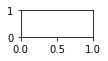

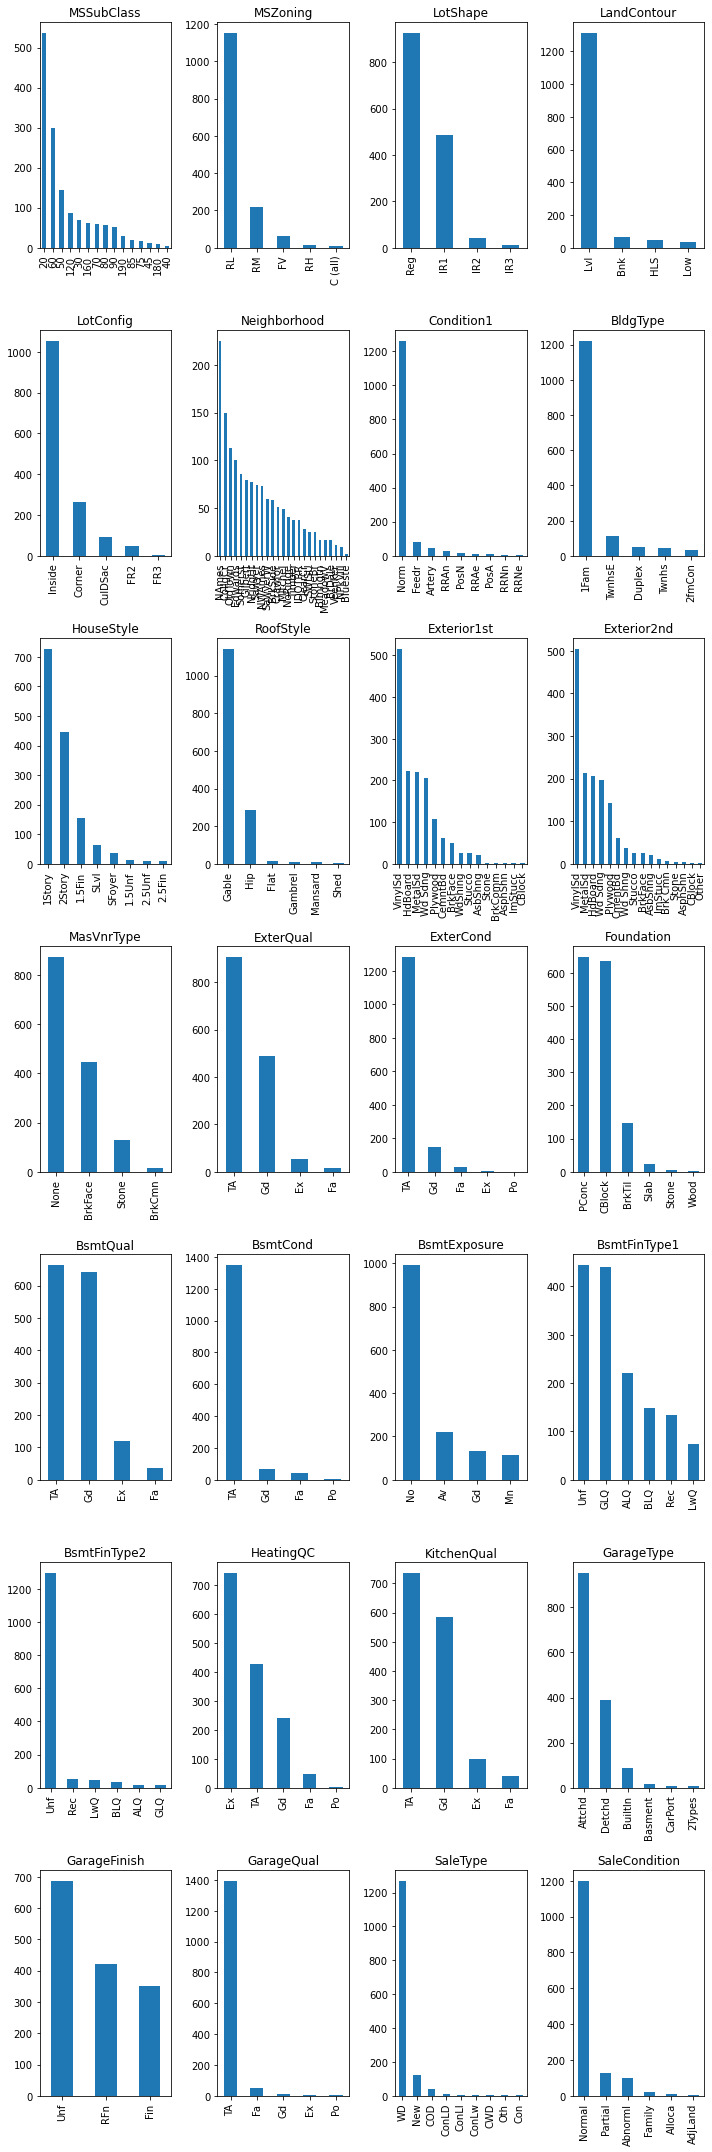

In [70]:
plt.subplot(7,4,28)
plt.figure(figsize=(10,30))
for i in range(len(cate.columns)-1):
    plt.subplot(7,4,i+1)
    cate[cate.columns[i]].value_counts().plot.bar()
    plt.title("{}".format(cate.columns[i]))
plt.tight_layout()

In [71]:
#preview with encoding labels
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
cate_labels=cate.iloc[:,:-1].apply(LE.fit_transform)

In [72]:
cate_labels['SalePrice']=df['SalePrice']

In [73]:
abs(cate_labels.corr()['SalePrice']).sort_values()

LandContour      0.015453
MasVnrType       0.018216
BsmtFinType2     0.033235
BsmtCond         0.052563
MSSubClass       0.054795
SaleType         0.054911
LotConfig        0.067396
BsmtFinType1     0.073439
BldgType         0.085591
Condition1       0.091155
GarageQual       0.098759
Exterior1st      0.103551
Exterior2nd      0.103766
ExterCond        0.117303
MSZoning         0.166872
HouseStyle       0.180163
Neighborhood     0.210851
SaleCondition    0.213092
RoofStyle        0.222405
LotShape         0.255580
BsmtExposure     0.295407
GarageType       0.302105
Foundation       0.382479
HeatingQC        0.400178
GarageFinish     0.537242
KitchenQual      0.589189
BsmtQual         0.607186
ExterQual        0.636884
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [74]:
cate.drop(['MasVnrType'],axis=1,inplace=True)
cate_labels.drop(['MasVnrType'],axis=1,inplace=True)
df.drop(['MasVnrType'],axis=1,inplace=True)
df_test.drop(['MasVnrType'],axis=1,inplace=True)

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
cate.drop(['LandContour'],axis=1,inplace=True)
cate_labels.drop(['LandContour'],axis=1,inplace=True)
df.drop(['LandContour'],axis=1,inplace=True)
df_test.drop(['LandContour'],axis=1,inplace=True)

In [76]:
cate

MSSubClass MSZoning LotShape LotConfig Neighborhood Condition1 BldgType  \
0            60       RL      Reg    Inside      CollgCr       Norm     1Fam   
1            20       RL      Reg       FR2      Veenker      Feedr     1Fam   
2            60       RL      IR1    Inside      CollgCr       Norm     1Fam   
3            70       RL      IR1    Corner      Crawfor       Norm     1Fam   
4            60       RL      IR1       FR2      NoRidge       Norm     1Fam   
...         ...      ...      ...       ...          ...        ...      ...   
1455         60       RL      Reg    Inside      Gilbert       Norm     1Fam   
1456         20       RL      Reg    Inside       NWAmes       Norm     1Fam   
1457         70       RL      Reg    Inside      Crawfor       Norm     1Fam   
1458         20       RL      Reg    Inside        NAmes       Norm     1Fam   
1459         20       RL      Reg    Inside      Edwards       Norm     1Fam   

     HouseStyle RoofStyle Exterior1st  ... BsmtFinType1 BsmtFinType2  \
0        2Story     Gable     VinylSd  ...          GLQ          Unf   
1        1Story     Gable     MetalSd  ...          ALQ          Unf   
2        2Story     Gable     VinylSd  ...          GLQ          Unf   
3        2Story     Gable     Wd Sdng  ...          ALQ          Unf   
4        2Story     Gable     VinylSd  ...          GLQ          Unf   
...         ...       ...         ...  ...          ...          ...   
1455     2Story     Gable     VinylSd  ...          Unf          Unf   
1456     1Story     Gable     Plywood  ...          ALQ          Rec   
1457     2Story     Gable     CemntBd  ...          GLQ          Unf   
1458     1Story       Hip     MetalSd  ...          GLQ          Rec   
1459     1Story     Gable     HdBoard  ...          BLQ          LwQ   

     HeatingQC KitchenQual GarageType GarageFinish GarageQual SaleType  \
0           Ex          Gd     Attchd          RFn         TA       WD   
1           Ex          TA     Attchd          RFn         TA       WD   
2           Ex          Gd     Attchd          RFn         TA       WD   
3           Gd          Gd     Detchd          Unf         TA       WD   
4           Ex          Gd     Attchd          RFn         TA       WD   
...        ...         ...        ...          ...        ...      ...   
1455        Ex          TA     Attchd          RFn         TA       WD   
1456        TA          TA     Attchd          Unf         TA       WD   
1457        Ex          Gd     Attchd          RFn         TA       WD   
1458        Gd          Gd     Attchd          Unf         TA       WD   
1459        Gd          TA     Attchd          Fin         TA       WD   

     SaleCondition SalePrice  
0           Normal    208500  
1           Normal    181500  
2           Normal    223500  
3          Abnorml    140000  
4           Normal    250000  
...            ...       ...  
1455        Normal    175000  
1456        Normal    210000  
1457        Normal    266500  
1458        Normal    142125  
1459        Normal    147500  

[1460 rows x 27 columns]

In [77]:
cate_corr=cate_labels.corr()

<AxesSubplot:>

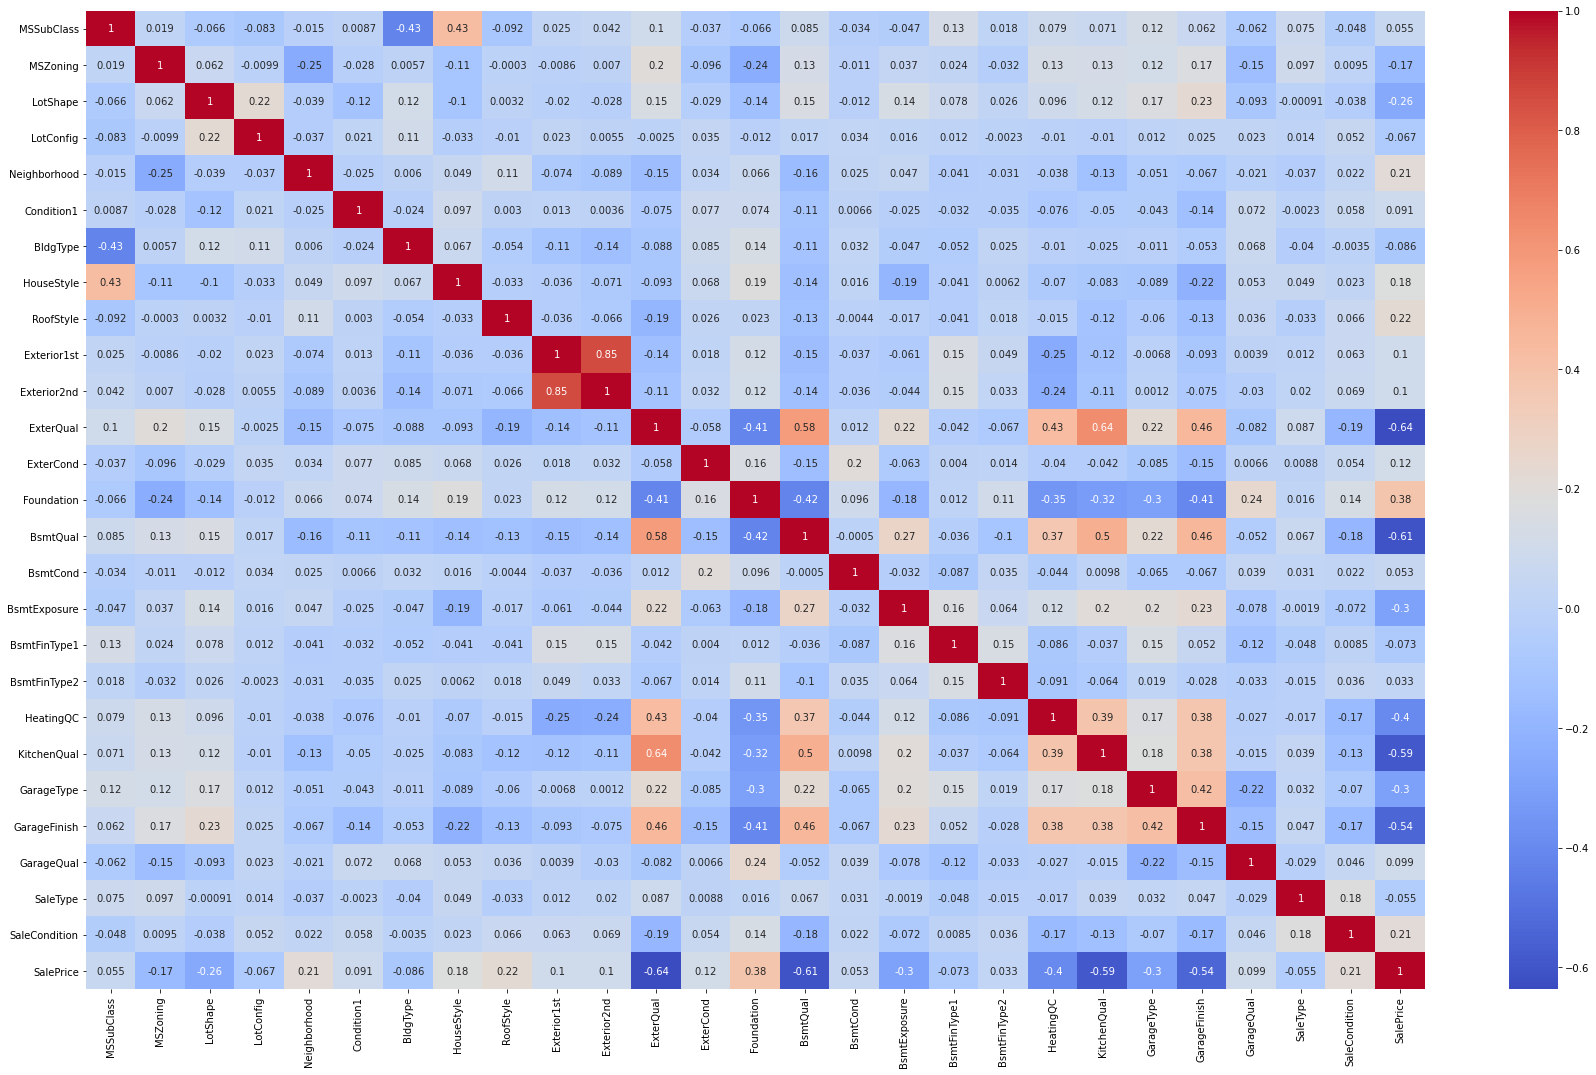

In [78]:
plt.figure(figsize=(30,18))
sns.heatmap(cate_corr,annot=True,cmap='coolwarm')

In [79]:
#It looks good to go next.

In [80]:
#Overall correlation

In [81]:
nume=nume.reset_index()

In [82]:
overall=pd.concat([nume,cate_labels],axis=1)

In [83]:
overall=overall.set_index('Id')

In [84]:
over_corr=overall.corr()

<AxesSubplot:>

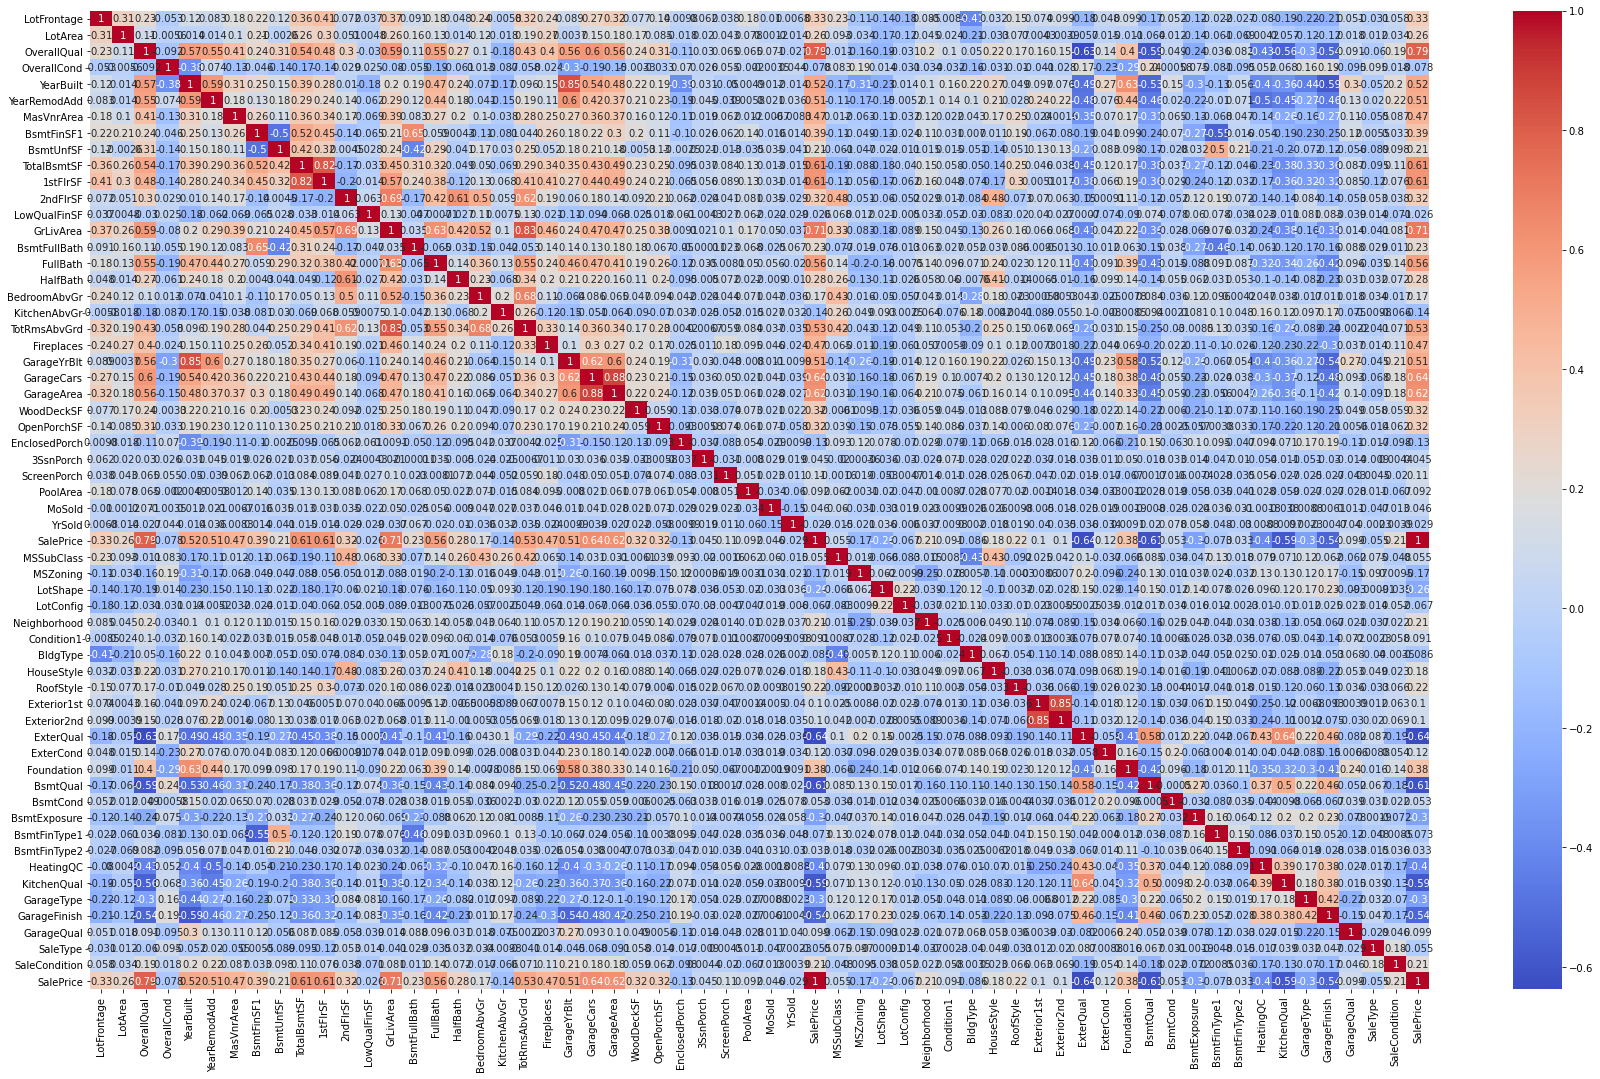

In [85]:
plt.figure(figsize=(30,18))
sns.heatmap(over_corr,annot=True,cmap='coolwarm')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrAr

### Testset fillna

In [87]:
df_test.isna().sum().sort_values()

Id                 0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
HeatingQC          0
TotRmsAbvGrd       0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MoSold             0
YrSold             0
Fireplaces         0
Foundation         0
SaleCondition      0
ExterQual          0
YearBuilt          0
YearRemodAdd       0
ExterCond          0
RoofStyle          0
HouseStyle         0
BldgType           0
OverallCond        0
OverallQual        0
Condition1         0
Neighborhood       0
LotConfig          0
LotShape           0
LotArea            0
MSSubClass         0
GarageCars         1
GarageArea         1
KitchenQual        1
TotalBsmtSF        1
Exterior1st        1
BsmtFinSF1         1
SaleType           1
BsmtUnfSF          1
Exterior2nd        1
BsmtFullBath       2
MSZoning     

In [88]:
df_test.GarageYrBlt.fillna(df_test.YearBuilt,inplace=True)

In [89]:
df_test.GarageFinish.value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [90]:
df_test.GarageFinish.fillna(df_test.GarageFinish.mode()[0],inplace=True)

In [91]:
df_test.GarageType.value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [92]:
df_test.GarageType.fillna(df_test.GarageType.mode()[0],inplace=True)

In [93]:
df_test.BsmtExposure.value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [94]:
df_test.BsmtExposure.fillna(df_test.BsmtExposure.mode()[0],inplace=True)

In [95]:
df_test.MasVnrArea.value_counts()[0]/len(df_test)
df_test.MasVnrArea.fillna(df_test.MasVnrArea.mode()[0],inplace=True)

In [96]:
df_test.BsmtQual.value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [97]:
df_test.BsmtQual.fillna(df_test.ExterQual,inplace=True)

In [98]:
df_test.BsmtFinType1.value_counts() 
# hardest part for data preprocessing here. I put the most frequent one since it does not have much correlation to the saleprice.

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [99]:
df_test_nan=df_test.loc[df_test.BsmtFinType1.isna()]
df_test_nan[['BsmtQual','BsmtExposure','BsmtFullBath']] 

BsmtQual BsmtExposure  BsmtFullBath
125        TA           No           0.0
133        TA           No           0.0
269        TA           No           0.0
318        TA           No           0.0
354        TA           No           0.0
387        TA           No           0.0
388        TA           No           0.0
396        Gd           No           0.0
397        TA           No           0.0
398        TA           No           0.0
400        TA           No           0.0
455        Fa           No           0.0
590        TA           No           0.0
606        TA           No           0.0
608        TA           No           0.0
660        TA           No           NaN
662        TA           No           0.0
728        TA           No           NaN
729        TA           No           0.0
730        TA           No           0.0
733        TA           No           0.0
756        Fa           No           0.0
764        TA           No           0.0
927        TA           No           0.0
975        TA           No           0.0
992        TA           No           0.0
993        TA           No           0.0
1030       Fa           No           0.0
1038       TA           No           0.0
1087       TA           No           0.0
1092       TA           No           0.0
1104       TA           No           0.0
1118       TA           No           0.0
1139       TA           No           0.0
1242       TA           No           0.0
1303       TA           No           0.0
1306       TA           No           0.0
1343       TA           No           0.0
1344       TA           No           0.0
1364       TA           No           0.0
1431       TA           No           0.0
1444       TA           No           0.0

In [100]:
df_test.BsmtFinType1.fillna('Unf',inplace=True)
df_test.BsmtFullBath.fillna(df_test.BsmtFullBath.mode()[0],inplace=True) # handling with columns with 1 or 2 Nan.-> fill the most frequent value in the nan
df_test.BsmtUnfSF.fillna(df_test.BsmtUnfSF.mode()[0],inplace=True)
df_test.BsmtFinSF1.fillna(df_test.BsmtFinSF1.mode()[0],inplace=True)
df_test.GarageCars.fillna(df_test.GarageCars.mode()[0],inplace=True)
df_test.GarageArea.fillna(df_test.GarageArea.mode()[0],inplace=True)
df_test.TotalBsmtSF.fillna(df_test.TotalBsmtSF.mode()[0],inplace=True)
df_test.Exterior1st.fillna(df_test.Exterior1st.mode()[0],inplace=True)
df_test.Exterior2nd.fillna(df_test.Exterior2nd.mode()[0],inplace=True)
df_test.KitchenQual.fillna(df_test.KitchenQual.mode()[0],inplace=True)
df_test.MSZoning.fillna(df_test.MSZoning.mode()[0],inplace=True)

In [101]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),inplace=True)

In [102]:
df_test.GarageQual.value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [103]:
df_test.GarageQual.fillna(df_test.GarageQual.mode()[0],inplace=True)

In [104]:
df_test.BsmtCond.value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [105]:
df_test.BsmtCond.fillna(df_test.BsmtCond.mode()[0],inplace=True)

In [106]:
df_test.BsmtFinType2.value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [107]:
df_test.BsmtFinType2.fillna(df_test.BsmtFinType2.mode()[0],inplace=True)

In [108]:
df_test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [109]:
df_test.SaleType.fillna(df_test.SaleType.mode()[0],inplace=True)

In [110]:
df_test.isna().sum().sort_values()

Id               0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
HeatingQC        0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
GarageYrBlt      0
SaleType         0
TotalBsmtSF      0
BsmtFinType2     0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
BsmtUnfSF        0
YearBuilt        0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual    

### get_dummies

In [111]:
df=df.reset_index(drop=True)

In [112]:
df=df.set_index('Id')
df_test=df_test.set_index('Id')

In [113]:
df_train=df.iloc[:,:-1]
df_y=df.iloc[:,-1]
df_all=pd.concat([df_train,df_test])

In [114]:
df_all=pd.get_dummies(df_all)

In [115]:
df_train=df_all.iloc[:1460,:]
df_test=df_all.iloc[1460:,:]

In [116]:
df_train=pd.concat([df_train,df_y],axis=1)

In [117]:
df_train

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1            65.0     8450            7            5       2003          2003   
2            80.0     9600            6            8       1976          1976   
3            68.0    11250            7            5       2001          2002   
4            60.0     9550            7            5       1915          1970   
5            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1456         62.0     7917            6            5       1999          2000   
1457         85.0    13175            6            6       1978          1988   
1458         66.0     9042            7            9       1941          2006   
1459         68.0     9717            5            6       1950          1996   
1460         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  SaleType_New  \
Id                                                    ...                 
1          196.0       706.0      150.0        856.0  ...             0   
2            0.0       978.0      284.0       1262.0  ...             0   
3          162.0       486.0      434.0        920.0  ...             0   
4            0.0       216.0      540.0        756.0  ...             0   
5          350.0       655.0      490.0       1145.0  ...             0   
...          ...         ...        ...          ...  ...           ...   
1456         0.0         0.0      953.0        953.0  ...             0   
1457       119.0       790.0      589.0       1542.0  ...             0   
1458         0.0       275.0      877.0       1152.0  ...             0   
1459         0.0        49.0        0.0       1078.0  ...             0   
1460         0.0       830.0      136.0       1256.0  ...             0   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
Id                                                                              
1                0            1                      0                      0   
2                0            1                      0                      0   
3                0            1                      0                      0   
4                0            1                      1                      0   
5                0            1                      0                      0   
...            ...          ...                    ...                    ...   
1456             0            1                      0                      0   
1457             0            1                      0                      0   
1458             0            1                      0                      0   
1459             0            1                      0                      0   
1460             0            1                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
Id                                                                       
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     1   
4                        0                     0                     0   
5                        0                     0                     1   
...                    ...                   ...                   ...   
1456                     0                     0                     1   
1457                     0                     0                     1   
1458                     0                     0                     1   
1459                     0                     0                     1   
1460                     0        

In [118]:
df_test

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1461         80.0    11622            5            6       1961          1961   
1462         81.0    14267            6            6       1958          1958   
1463         74.0    13830            5            5       1997          1998   
1464         78.0     9978            6            6       1998          1998   
1465         43.0     5005            8            5       1992          1992   
...           ...      ...          ...          ...        ...           ...   
2915         21.0     1936            4            7       1970          1970   
2916         21.0     1894            4            5       1970          1970   
2917        160.0    20000            5            7       1960          1996   
2918         62.0    10441            5            5       1992          1992   
2919         74.0     9627            7            5       1993          1994   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLw  \
Id                                                    ...                   
1461         0.0       468.0      270.0        882.0  ...               0   
1462       108.0       923.0      406.0       1329.0  ...               0   
1463         0.0       791.0      137.0        928.0  ...               0   
1464        20.0       602.0      324.0        926.0  ...               0   
1465         0.0       263.0     1017.0       1280.0  ...               0   
...          ...         ...        ...          ...  ...             ...   
2915         0.0         0.0      546.0        546.0  ...               0   
2916         0.0       252.0      294.0        546.0  ...               0   
2917         0.0      1224.0        0.0       1224.0  ...               0   
2918         0.0       337.0      575.0        912.0  ...               0   
2919        94.0       758.0      238.0        996.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
Id                                                                     
1461             0             0            1                      0   
1462             0             0            1                      0   
1463             0             0            1                      0   
1464             0             0            1                      0   
1465             0             0            1                      0   
...            ...           ...          ...                    ...   
2915             0             0            1                      0   
2916             0             0            1                      1   
2917             0             0            1                      1   
2918             0             0            1                      0   
2919             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1461                      0                     0                     0   
1462                      0                     0                     0   
1463                      0                     0                     0   
1464                      0                     0                     0   
1465                      0                     0                     0   
...                     ...                   ...                   ...   
2915                      0                     0                     0   
2916                      0                     0                     0   
2917                      0                     0                     0   
2918                      0                     0                     0   
2919                      0                     0                     0   

      SaleCondition_Normal  SaleCondi

## Train and validation dataset

In [119]:
from sklearn.model_selection import RepeatedKFold,KFold, cross_validate, cross_val_score

rkf = RepeatedKFold(n_splits=10, n_repeats=5,random_state=42)
X_train, y_train= df_train.iloc[:,:-1],df_train['SalePrice']

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train,X_val,y_train,y_val=train_test_split(df_train.iloc[:,:-1],df_train['SalePrice'],test_size=0.1,random_state=42,shuffle=True)

In [121]:
from sklearn.preprocessing import MinMaxScaler
sc=StandardScaler()

## Training

### Linear

In [122]:
linear=make_pipeline(sc,LinearRegression())

In [123]:
linear.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [124]:
y_pred=linear.predict(X_val)

In [125]:
y_pred

array([1.53090826e+05, 3.36210826e+05, 9.42108255e+04, 1.94594826e+05,
       3.23180499e+05, 5.79964987e+04, 2.50060499e+05, 1.47506826e+05,
       5.82268255e+04, 1.44098826e+05, 1.43874826e+05, 1.10764499e+05,
       8.51084987e+04, 2.40860499e+05, 1.68786826e+05, 1.33474826e+05,
       1.92194826e+05, 1.28786826e+05, 1.31132499e+05, 2.13852499e+05,
       1.80994826e+05, 2.07090826e+05, 1.86226826e+05, 1.34226826e+05,
       2.07004499e+05, 1.43900499e+05, 2.09138826e+05, 1.00226826e+05,
       1.67346826e+05, 2.04418826e+05, 1.35052499e+05, 2.82124499e+05,
       2.67762826e+05, 1.12290826e+05, 2.47922826e+05, 1.44322826e+05,
       1.56924499e+05, 2.05324499e+05, 3.16946826e+05, 1.19522826e+05,
       1.39746826e+05, 2.31538826e+05, 1.01708499e+05, 3.50072915e+05,
       1.32962826e+05, 1.35970826e+05, 9.73628255e+04, 1.29826826e+05,
       4.02932499e+05, 1.26108499e+05, 1.18466826e+05, 2.61138826e+05,
       8.46268255e+04, 2.99154826e+05, 1.77780499e+05, 2.25500499e+05,
      

In [126]:
y_val

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
527     132000
102     178000
1093    136500
412     145000
1393    123000
Name: SalePrice, Length: 146, dtype: int64

In [127]:
linear.score(X_val,y_val)

-4.405028050520639e+24

In [128]:
linear.score(X_train,y_train)

0.8944427169352616

In [129]:
scores_linear=cross_validate(linear,X_train,y_train,cv=rkf,scoring='r2')
scores_linear['test_score'].mean()

-1.4456006505394096e+25

In [130]:
scores_linear

{'fit_time': array([0.02502179, 0.02502036, 0.02301908, 0.02201867, 0.02201843,
        0.02602243, 0.02301908, 0.02101779, 0.02201867, 0.02602196,
        0.02201891, 0.02201915, 0.02101755, 0.02201796, 0.02301979,
        0.02201819, 0.02201867, 0.02201939, 0.02201819, 0.02101731,
        0.02201796, 0.0260222 , 0.02201796, 0.0240202 , 0.02502179,
        0.02101779, 0.02101755, 0.02361321, 0.0250206 , 0.02201939,
        0.02101803, 0.02502012, 0.02402115, 0.02301884, 0.02201891,
        0.02302027, 0.02201772, 0.02702212, 0.0260222 , 0.02602243,
        0.02401996, 0.02201867, 0.02201796, 0.0260222 , 0.02301979,
        0.0210166 , 0.02602196, 0.02201843, 0.02301979, 0.02253366]),
 'score_time': array([0.00200152, 0.00400352, 0.002002  , 0.00300264, 0.002002  ,
        0.00300241, 0.00300217, 0.002002  , 0.00200176, 0.00400329,
        0.00300264, 0.00300241, 0.00200176, 0.00300312, 0.00200105,
        0.00300288, 0.00300241, 0.00400329, 0.002002  , 0.00300312,
        0.00300336, 

In [131]:
cross_val=cross_val_score(linear,X_train,y_train,cv=10,scoring='r2')
cross_val.mean()

-4.354238128055513e+23

In [132]:
y_test_pred_linear=linear.predict(df_test)

In [133]:
y_test_pred_linear

array([ 2.08219404e+17,  2.08219404e+17, -2.80173811e+17, ...,
        2.08219404e+17, -1.12221753e+17, -2.80173811e+17])

### Elastic Net

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
EN=make_pipeline(sc,ElasticNet())
parametersGrid = {"elasticnet__max_iter": [1, 5, 10,100,1000],
                      "elasticnet__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "elasticnet__l1_ratio": np.arange(0.0, 1.0, 0.1)}
grid = GridSearchCV(EN, parametersGrid,scoring='r2', cv=10)
grid.fit(X_train,y_train)
Y_pred = grid.predict(X_val)

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 906050405472.7357, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924255071408.5059, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 839570777676.8193, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345385503541.91486, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295364130647.4865, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339975263990.4791, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425691009079.2951, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440367376545.31995, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391093706621.4425, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370177139893.7263, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381600711423.8164, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336772755658.6999, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333364727265.6314, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375590046302.63025, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414620688757.49927, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440344865940.0077, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391071789252.5235, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434132896485.5666, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336730425744.417, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345315069068.13776, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295291448516.01697, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333337432427.1825, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375562485058.0737, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414592818409.5007, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425647327123.9227, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440322352327.5144, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391049868875.4546, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370074442586.2203, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381498087648.178, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336672379188.3284, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333310127667.79877, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375534914227.1276, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414564938718.1603, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478834343590.8695, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425625481896.59314, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440299835707.097, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383279205869.31714, tolerance: 711690129.1104344
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369976180143.4458, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381392987475.10284, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333282812981.9172, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375507333804.555, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414537049678.5451, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425603633835.2258, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440277316078.0125, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391006019093.46436, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369600210401.4918, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380967547063.9537, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336136948929.4725, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334609819639.1924, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376847683667.00574, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415892755572.874, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441276794067.8274, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391979129008.924, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435048985633.24896, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337489250295.06537, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346173547745.8706, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296006134119.76855, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415617886171.7488, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411553434756.36554, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418512155120.2821, tolerance: 725342319.8812188
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441052765597.4566, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391761032864.18176, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434828760350.7908, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337241231467.3876, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345925230302.5888, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295791007539.90027, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376303385826.8467, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415342100474.87524, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411278593484.66986, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391542638552.95636, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434608246687.44824, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473371126147.6865, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336999275850.6936, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345681395201.857, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295580313509.6709, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376029822536.1108, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415065393645.2959, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411002870084.2856, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440603814000.0402, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391323945245.54224, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434387443932.0165, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336722495734.0436, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345412882888.49615, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295345342441.45764, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333528450145.99084, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375755309457.54065, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414787760882.55975, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425702195383.47577, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440378888498.3382, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391104952098.3695, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369625754886.5636, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380959858872.71906, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336119856384.51984, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393186746829.9519, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345786788697.6985, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388178799619.2344, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435151620395.11993, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450109992056.04144, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400573722262.6666, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919863507238.0051, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938870868958.6466, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 853234629279.6411, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301867839058.41003, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347494709442.21063, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387364267391.267, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384586134736.63336, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423736080637.6805, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419660121952.1841, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432026344784.0764, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446893396444.7933, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397445157218.83093, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15878688953.002563, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15857334964.6969, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14450941214.814331, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421205378032.9379, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417129866799.595, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424138035477.02466, tolerance: 725342319.8812188
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429910003865.0049, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444714128523.9381, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395324933292.3893, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282929392901.521, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285574359971.04425, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255497480972.60193, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384033481486.69946, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337247849586.4718, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379514788578.87885, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481052562925.5752, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427766663717.16614, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442506186379.52673, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360308334009.5666, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369883037616.1812, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326573710788.8155, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415893214196.5258, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411828386394.88586, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418789763710.29407, tolerance: 725342319.8812188
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525579701353.2081, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474210912633.92053, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518302664809.06757, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403062466543.9772, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415045183359.0697, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358814292536.48566, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455288437326.0031, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403823705091.2645, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448412909029.3309, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495643351344.1439, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511932104984.1338, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460815070235.11816, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017325754605.4965, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1041822391857.6445, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949648760379.0688, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389661316202.9535, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429911421866.91284, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423579862670.9002, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387258345679.85986, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430976216572.8824, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471312217043.7325, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472836880066.8708, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488727033539.9874, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438143000721.6533, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972457647593.3107, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994464604814.4889, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905261538466.1995, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319783953813.43933, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364602015121.2319, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405093247930.2524, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365595150355.0859, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408459263297.7181, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448104680112.8616, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461421635991.88696, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411574804952.9689, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454874670048.3601, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451193004884.5199, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401630448021.14685, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444803551211.2074, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763921617049.5488, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786732660990.9587, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737868849861.7056, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759385426544.8704, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779918312055.5847, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 713149442449.582, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717412800218.0636, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666754622318.2994, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700841212537.2424, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676229889479.3455, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728022799416.726, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724363231906.8096, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700906491299.0604, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697326921825.6473, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703599386750.0251, tolerance: 725342319.8812188
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582077157454.3656, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623847573260.815, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672681098953.3268, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673928635495.7009, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622515127847.4154, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663071959136.7046, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647154912893.4061, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595524805277.2385, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 637583776092.5742, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616606146519.6716, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564821082200.4973, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608087362850.6167, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561919237070.9487, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578732105268.5934, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526901702799.06354, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058758936313.8038, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085487993938.7423, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990645094471.2699, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256112539249.38342, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328094295730.3549, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351554705220.9789, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1793286649536.282, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1914627626804.5322, tolerance: 711792939.9706756
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1919867390272.2656, tolerance: 724791841.4249041
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1807425078443.4683, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1797443888650.4832, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1709219490383.8696, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1718414579214.484, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705503725004.793, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1626360381790.6191, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1624059250566.8975, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1608140495040.1294, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1538966458467.2434, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1562649674430.9219, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1452214347940.8335, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1520921132906.3228, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1355301818477.149, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1417065352186.892, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1392948231075.228, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1243436694484.3262, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1297242232974.5232, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268479654930.7944, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1107148181182.3682, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151744933830.694, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1117153082242.4746, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 945899761352.6381, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979690044170.179, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938478962289.9651, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786861001446.0164, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 738278128469.8528, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768199073926.4438, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3045851371480.058, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3203260709176.4736, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3243667087546.731, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3263561311462.7266, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3045851371480.0576, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3203260709176.469, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3027833267092.214, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3123712463894.3936, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2914919411538.9043, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2786820266458.301, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2872477999177.852, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2680867931812.5845, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2446388812502.6724, tolerance: 702235494.6783398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2519604366871.8457, tolerance: 725894087.6557243
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2350645662375.1787, tolerance: 676921220.0183051
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251758687076.63013, tolerance: 711808318.2706782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263553667541.63037, tolerance: 722507929.5029123
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244632646526.09888, tolerance: 672599230.3114893
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

In [135]:
grid.best_params_

{'elasticnet__alpha': 1,
 'elasticnet__l1_ratio': 0.30000000000000004,
 'elasticnet__max_iter': 100}

In [136]:
EN.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [137]:
y_pred_EN=EN.predict(X_val)

In [138]:
EN.score(X_val,y_val)

0.8503126654498293

In [139]:
EN.score(X_train,y_train)

0.8772818433436917

In [140]:
scores_EN=cross_validate(EN,X_train,y_train,cv=rkf,scoring=['r2','neg_mean_squared_log_error'])
scores_EN['test_r2'].mean()

0.8225304603195425

### Random forest

In [141]:
from sklearn.ensemble import RandomForestRegressor
Rf=make_pipeline(sc,RandomForestRegressor())

parametersGrid = {
 'randomforestregressor__max_depth': [10, 20, 30, 40],
 'randomforestregressor__min_samples_split': [2, 5],
 'randomforestregressor__n_estimators': [200, 600, 1000]}
grid = GridSearchCV(estimator=Rf, param_grid=parametersGrid,scoring='r2', cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [10, 20, 30, 40],
                         'randomforestregressor__min_samples_split': [2, 5],
                         'randomforestregressor__n_estimators': [200, 600,
                                                                 1000]},
             scoring='r2')

In [142]:
grid.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 200}

In [143]:
Rf.set_params(**grid.best_params_)
Rf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])

In [144]:
y_val_pred_rf=Rf.predict(X_val)

In [145]:
Rf.score(X_val,y_val)

0.8997474255065262

In [146]:
Rf.score(X_train,y_train)

0.9804445111653701

In [147]:
scores_Rf=cross_validate(Rf,X_train,y_train,cv=rkf,scoring=['r2','neg_mean_squared_log_error'])
scores_Rf['test_r2'].mean()

0.8492292924135262

In [148]:
scores_Rf['test_r2']

array([0.88933097, 0.88021324, 0.84531696, 0.7903508 , 0.89306429,
       0.88097132, 0.85004549, 0.80730584, 0.77902549, 0.88686972,
       0.90656698, 0.90097329, 0.8882875 , 0.89803123, 0.84835859,
       0.74870264, 0.660967  , 0.75970674, 0.83423885, 0.86415649,
       0.90910044, 0.78880134, 0.89364398, 0.70502377, 0.93801654,
       0.89645462, 0.90358598, 0.79304399, 0.84775642, 0.88053371,
       0.85732092, 0.78063342, 0.87900795, 0.90158396, 0.86838757,
       0.9023759 , 0.93314113, 0.72663277, 0.88843612, 0.86349218,
       0.83397759, 0.84032108, 0.72831131, 0.89616653, 0.88902955,
       0.85929343, 0.86708651, 0.89606567, 0.85846682, 0.82328999])

In [149]:
y_test_pred_Rf=Rf.predict(df_test)

In [150]:
y_test_pred_Rf

array([125929.        , 154760.5       , 179710.99875   , ...,
       158095.24      , 118861.25      , 224521.31888889])

### LGBM

In [152]:
from lightgbm import LGBMRegressor

LGBM=make_pipeline(sc,LGBMRegressor())

In [153]:
LGBM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lgbmregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lgbmregressor__boosting_type', 'lgbmregressor__class_weight', 'lgbmregressor__colsample_bytree', 'lgbmregressor__importance_type', 'lgbmregressor__learning_rate', 'lgbmregressor__max_depth', 'lgbmregressor__min_child_samples', 'lgbmregressor__min_child_weight', 'lgbmregressor__min_split_gain', 'lgbmregressor__n_estimators', 'lgbmregressor__n_jobs', 'lgbmregressor__num_leaves', 'lgbmregressor__objective', 'lgbmregressor__random_state', 'lgbmregressor__reg_alpha', 'lgbmregressor__reg_lambda', 'lgbmregressor__silent', 'lgbmregressor__subsample', 'lgbmregressor__subsample_for_bin', 'lgbmregressor__subsample_freq'])

In [154]:
parametersGrid = {
    'lgbmregressor__num_leaves': [31, 127],
    'lgbmregressor__reg_alpha': [0.1, 0.5],
    'lgbmregressor__min_data_in_leaf': [30, 50, 100, 300, 400],
    'lgbmregressor__lambda_l1': [0, 1, 1.5],
    'lgbmregressor__lambda_l2': [0, 1]
    }
grid = GridSearchCV(estimator=LGBM, param_grid=parametersGrid,scoring='r2', cv=10)
grid.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lamb

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] la

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] mi

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lgbmregressor', LGBMRegressor())]),
             param_grid={'lgbmregressor__lambda_l1': [0, 1, 1.5],
                         'lgbmregressor__lambda_l2': [0, 1],
                         'lgbmregressor__min_data_in_leaf': [30, 50, 100, 300,
                                                             400],
                         'lgbmregressor__num_leaves': [31, 127],
                         'lgbmregressor__reg_alpha': [0.1, 0.5]},
             scoring='r2')

In [155]:
LGBM.set_params(**grid.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(lambda_l1=1.5, lambda_l2=1, min_data_in_leaf=30,
                               reg_alpha=0.1))])

In [156]:
LGBM.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(lambda_l1=1.5, lambda_l2=1, min_data_in_leaf=30,
                               reg_alpha=0.1))])

In [157]:
y_val_pred_lgbm=LGBM.predict(X_val)

In [158]:
LGBM.score(X_val,y_val)

0.8822126160847398

In [159]:
LGBM.score(X_train,y_train)

0.9668846055418436

In [160]:
scores_LGBM=cross_validate(LGBM,X_train,y_train,cv=rkf,scoring=['r2','neg_mean_squared_log_error'])
scores_LGBM['test_r2'].mean()

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lamb

0.8675189649709413

In [161]:
scores_LGBM['test_r2']

array([0.91074365, 0.88176913, 0.85384267, 0.83022153, 0.92526458,
       0.89090103, 0.89157713, 0.85404653, 0.75609866, 0.91237695,
       0.92632322, 0.9277283 , 0.90453255, 0.92963654, 0.87943023,
       0.76778866, 0.72448821, 0.79089142, 0.82164024, 0.9028484 ,
       0.92299223, 0.78745258, 0.91637537, 0.74054982, 0.93932383,
       0.91500606, 0.91949194, 0.80157671, 0.88001985, 0.87639719,
       0.88209335, 0.78284946, 0.88356468, 0.89019861, 0.88002663,
       0.91327585, 0.94169082, 0.76921017, 0.89026779, 0.8866783 ,
       0.86264799, 0.84110462, 0.81651627, 0.91498831, 0.91057283,
       0.87410507, 0.86874995, 0.88499599, 0.88033219, 0.82074418])

In [162]:
y_test_pred_lgbm=LGBM.predict(df_test)

In [163]:
y_test_pred_lgbm

array([128163.65838777, 158334.04870966, 179869.85005577, ...,
       167880.47992342, 121650.91285202, 204500.57410073])

### XGB

In [164]:
from xgboost import XGBRegressor
#print(XGBRegressor.__version__)

In [165]:
xgb=make_pipeline(sc,XGBRegressor())

In [166]:
xgb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'xgbregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'xgbregressor__objective', 'xgbregressor__base_score', 'xgbregressor__booster', 'xgbregressor__colsample_bylevel', 'xgbregressor__colsample_bynode', 'xgbregressor__colsample_bytree', 'xgbregressor__gamma', 'xgbregressor__gpu_id', 'xgbregressor__importance_type', 'xgbregressor__interaction_constraints', 'xgbregressor__learning_rate', 'xgbregressor__max_delta_step', 'xgbregressor__max_depth', 'xgbregressor__min_child_weight', 'xgbregressor__missing', 'xgbregressor__monotone_constraints', 'xgbregressor__n_estimators', 'xgbregressor__n_jobs', 'xgbregressor__num_parallel_tree', 'xgbregressor__random_state', 'xgbregressor__reg_alpha', 'xgbregressor__reg_lambda', 'xgbregressor__scale_pos_weight', 'xgbregressor__subsample', 'xgbregressor__tree_method', 'xgbregressor__validate_parameters', 'xgbregressor__verbosity'])

In [167]:
parameters = { 
              'xgbregressor__learning_rate': np.arange(0.01, 0.4, 0.02),
              'xgbregressor__max_depth': [4,5,6,7,8],
              'xgbregressor__gamma': [0.5,0.6,0.7,0.8,0.9]
}

In [168]:
grid = GridSearchCV(estimator=xgb, param_grid=parameters,scoring='r2', cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                           

In [169]:
grid.best_params_

{'xgbregressor__gamma': 0.5,
 'xgbregressor__learning_rate': 0.15,
 'xgbregressor__max_depth': 4}

In [170]:
xgb.set_params(**grid.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=0.5, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=0.15,
                              max_delta_step=None, max_depth=4,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [171]:
xgb.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0.5, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.15,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=24, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [172]:
y_val_pred_xgb=xgb.predict(X_val)

In [173]:
xgb.score(X_val,y_val)

0.8698189825706805

In [174]:
xgb.score(X_train,y_train)

0.985443527370049

In [175]:
y_test_pred_xgb=xgb.predict(df_test)

In [176]:
y_test_pred_xgb

array([125031.46 , 151226.   , 178423.2  , ..., 162281.94 , 126265.836,
       210513.33 ], dtype=float32)

In [177]:
scores_XGB=cross_validate(xgb,X_train,y_train,cv=rkf,scoring=['r2'])
scores_XGB['test_r2'].mean()

0.8536470297717496

In [178]:
scores_XGB['test_r2']

array([0.89165636, 0.89629046, 0.85266322, 0.63053992, 0.91178144,
       0.87880496, 0.88974601, 0.7805476 , 0.82853232, 0.90496533,
       0.93039838, 0.90253338, 0.89777377, 0.92148728, 0.8872651 ,
       0.86585147, 0.64939315, 0.68485857, 0.81720074, 0.88831805,
       0.94744726, 0.85698892, 0.90699805, 0.68838855, 0.94607762,
       0.91460291, 0.8906614 , 0.7116892 , 0.88351983, 0.88857596,
       0.90278368, 0.71554095, 0.89695607, 0.86643519, 0.88307231,
       0.89999213, 0.94533099, 0.68157513, 0.9046431 , 0.88300622,
       0.86931857, 0.85842259, 0.71771534, 0.89911472, 0.90351373,
       0.87824895, 0.7434102 , 0.8913998 , 0.89101581, 0.90529877])

### GBR

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

In [180]:
# GBR=make_pipeline(sc,GradientBoostingRegressor())

In [181]:
# GBR.get_params().keys()

In [182]:
# parameters = {
#     'gradientboostingregressor__max_depth': [80, 90, 100, 110],
#     'gradientboostingregressor__max_features': [2, 3],
#     'gradientboostingregressor__min_samples_leaf': [3, 4, 5],
#     'gradientboostingregressor__min_samples_split': [8, 10, 12],
#     'gradientboostingregressor__n_estimators': [100, 200, 300, 1000]
# }

In [183]:
# grid = GridSearchCV(estimator=GBR, param_grid=parameters,scoring='r2', cv=10)
# grid.fit(X_train,y_train)

In [184]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [185]:
y_val_pred_gbr=GBR.predict(X_val)

In [186]:
GBR.score(X_val,y_val)

0.9136019433060877

In [187]:
GBR.score(X_train,y_train)

0.9661679913951823

In [188]:
y_test_pred_gbr=GBR.predict(df_test)

In [189]:
y_test_pred_gbr

array([125232.00025929, 156118.36692432, 177277.82900249, ...,
       164342.61685234, 124691.06517421, 223579.52375357])

In [190]:
scores_GBR=cross_validate(GBR,X_train,y_train,cv=rkf,scoring=['r2','neg_mean_squared_log_error'])
scores_GBR['test_r2'].mean()

0.8720076308196785

In [191]:
np.sqrt(abs(scores_GBR['test_neg_mean_squared_log_error'])).mean()

0.13347967567359073

In [192]:
scores_GBR['test_r2']

array([0.92003673, 0.8948746 , 0.86230945, 0.74071859, 0.92525154,
       0.896461  , 0.88470748, 0.79364661, 0.87504839, 0.90817263,
       0.92011239, 0.91804795, 0.91946935, 0.89973644, 0.88511425,
       0.83427211, 0.74403218, 0.78486247, 0.82323355, 0.89764115,
       0.93169   , 0.85570102, 0.91437853, 0.71993652, 0.94044346,
       0.90112957, 0.92689238, 0.8062561 , 0.87960955, 0.88617247,
       0.89009176, 0.78295927, 0.91535911, 0.91270429, 0.85697778,
       0.89051475, 0.94838854, 0.72556562, 0.90544007, 0.8972395 ,
       0.85611311, 0.892482  , 0.77817607, 0.92207257, 0.9122807 ,
       0.87543625, 0.86332873, 0.90973849, 0.8872164 , 0.88833807])

In [193]:
#xgb regressor is very good algorithm for complicated features, but easy overfitting. lgbm, gbr and random forest regressors are all good to go. In this dataset, GBR has the best score to predict test data. 

In [194]:
answer=df_test.copy()
answer['SalePrice']=y_test_pred_gbr
answer=answer['SalePrice']

In [195]:
answer.to_csv("house_price_prediction_answers2.csv")

### voting (Just tried)

In [198]:
from sklearn.ensemble import VotingRegressor
estimators=[('GBR', GBR), ('rf', Rf), ('LGBM', LGBM),('xgb',xgb)]
ensemble = VotingRegressor(estimators)

In [199]:
ensemble.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


VotingRegressor(estimators=[('GBR', GradientBoostingRegressor()),
                            ('rf',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(max_depth=20,
                                                                    n_estimators=200))])),
                            ('LGBM',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('lgbmregressor',
                                              LGBMRegressor(lambda_l1=1.5,
                                                            lambda_l2=1,
                                                            min_data_in_leaf=30,
                                                            reg_alph

In [200]:
ensemble.score(X_val,y_val)

0.8988888101383835

In [201]:
scores_voting=cross_validate(ensemble,X_train,y_train,cv=rkf,scoring=['r2'])
scores_voting['test_r2'].mean()

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

0.8700450793331932

In [202]:
y_pred_ensemble=ensemble.predict(df_test)

In [203]:
answer=df_test.copy()
answer['SalePrice']=y_pred_ensemble
answer=answer['SalePrice']

In [204]:
answer.to_csv("house_price_prediction_answers_ensemble2.csv")

In [ ]:
"""
Overall, I've got 0.87 score with 0.132 score with test dataset in kaggle. 
"""